# Predicción de posiciones en la Formula 1

En este proyecto vamos a analizar datos de la fórmula 1 para poder predecir la posición que un piloto tendrá.

El enfoque se dará de los periodos 2014 - 2021 y 2022 - 2024 ya que los reglamentos se han modificado y queremos analizar si estos tienen un impacto en las variables a estudiar

## ¿Cómo es una carrera de Fórmula 1?

Para familiarizarnos con las bases de datos y sus variables, veamos en qué consiste una carrera de fórmula 1

Cada año (*temporada*), se realizan distintas carreras al rededor del mundo (*rounds*) donde compiten equipos (*constructores*) con dos pilotos (*drivers*), con el objetivo de sumar los suficientes puntos para ganar los campenatos: constructores y pilotos

Cada carrera (*race*) se compone de:
* Tres prácticas libres (*fp*), donde los equipos y pilotos tienen una hora (cada día) para poner a prueba sus autos y tácticas encaminadas a la carrera

* *Qualifications* para determinar el la posición (*position*) en la 'parrilla' (*grid*). El mejor tiempo saldrá desde la posición 1

    * Una Qualy se divide en 3: Q's
    * Q1 donde compiten todos los equipos y se eliminan 5 pilotos;
    * Q2 se eliminan 5 pilotos;
    * Q3 los 10 pilotos restantes compiten para obtener el mejor tiempo

El piloto que obtenga la posición 1 en la Q3 se lleva la "pole position"

* La carrera; se compite por los puntos (los primeros diez sólo obtienen) que suman tanto para el campeonanto de construcutores y de pilotos. Cada circuito tiene una distancia y eso determina el número de vueltas (*laps*) a realizar

Teniendo contexto del funcionamiento, pasemos a describir las variables

## Descripción de las variables

- `grid`: Posición de salida del piloto en la parrilla.
- `points`: Puntos obtenidos en la carrera.
- `laps`: Número de vueltas completadas.
- `q1_sec`, `q2_sec`, `q3_sec`: Tiempos de clasificación en segundos.
- `total_pit_time_ms`: Tiempo total en pits en milisegundos.
- `positionOrder`: Posición final del piloto (objetivo).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Nuestra base principal será races y sólo filtramos las carreras a partir de 2014

#races = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/races.csv', index_col='raceId')
races = pd.read_csv('races.csv', index_col='raceId')

races_2014_2024 = races[races['year'] >= 2014]
# extrayendo variables de interés
races_2014_2024 = races_2014_2024[['year', 'circuitId']]

In [ ]:
races_2014_2024

,year,circuitId
raceId,,
900,2014,1
901,2014,2
902,2014,3
903,2014,17
904,2014,4
...,...,...
1140,2024,32
1141,2024,18
1142,2024,80


In [5]:
# qualifying datos
#qualifying = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/qualifying.csv', index_col='raceId')
qualifying = pd.read_csv('qualifying.csv', index_col='raceId')


qualifying_2014_2024 = races_2014_2024.join(qualifying, on='raceId')

qualifying_2014_2024 = qualifying_2014_2024.drop(['year', 'circuitId', 'constructorId', 'number'], axis=1)

In [6]:
# attempt to merge
qualifying_2014_2024 = races_2014_2024.merge(qualifying_2014_2024, on='raceId')


In [ ]:
qualifying_2014_2024

,year,circuitId,qualifyId,driverId,position,q1,q2,q3
raceId,,,,,,,,
900,2014,1,5860,1,1,1:31.699,1:42.890,1:44.231
900,2014,1,5861,817,2,1:30.775,1:42.295,1:44.548
900,2014,1,5862,3,3,1:32.564,1:42.264,1:44.595
900,2014,1,5863,825,4,1:30.949,1:43.247,1:45.745
900,2014,1,5864,4,5,1:31.388,1:42.805,1:45.819
...,...,...,...,...,...,...,...,...
1144,2024,24,10547,848,16,1:23.821,\N,\N
1144,2024,24,10548,855,17,1:23.880,\N,\N
1144,2024,24,10549,1,18,1:23.887,\N,\N


In [7]:
# cambiando nombre a pilotos

#drivers = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/drivers.csv')
drivers = pd.read_csv('drivers.csv')

names = drivers.set_index('driverId')['surname'].to_dict()

qualifying_2014_2024['driverId'] = qualifying_2014_2024['driverId'].map(names)


In [ ]:
qualifying_2014_2024

,year,circuitId,qualifyId,driverId,position,q1,q2,q3
raceId,,,,,,,,
900,2014,1,5860,Hamilton,1,1:31.699,1:42.890,1:44.231
900,2014,1,5861,Ricciardo,2,1:30.775,1:42.295,1:44.548
900,2014,1,5862,Rosberg,3,1:32.564,1:42.264,1:44.595
900,2014,1,5863,Magnussen,4,1:30.949,1:43.247,1:45.745
900,2014,1,5864,Alonso,5,1:31.388,1:42.805,1:45.819
...,...,...,...,...,...,...,...,...
1144,2024,24,10547,Albon,16,1:23.821,\N,\N
1144,2024,24,10548,Zhou,17,1:23.880,\N,\N
1144,2024,24,10549,Hamilton,18,1:23.887,\N,\N


In [8]:
# pit stops en las carreras
#pits = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/pit_stops.csv', index_col='raceId')
pits = pd.read_csv('pit_stops.csv', index_col='raceId')


pits_2014_2024 = races_2014_2024.join(pits, on='raceId')

pits_2014_2024  = pits_2014_2024 .drop(['time', 'year', 'circuitId'], axis=1)

In [ ]:
pits_2014_2024 = races_2014_2024.merge(pits_2014_2024, on='raceId')

In [9]:
# lap_times en cada carrera
#lap_times = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/lap_times.csv', parse_dates=True)
lap_times = pd.read_csv('lap_times.csv', parse_dates=True)


lap_times_2014_2024 = lap_times[(lap_times['raceId'] >= 900) & (lap_times['raceId'] <= 1144)]
lap_times_2014_2024 = lap_times_2014_2024.set_index(['raceId', 'driverId'])


In [ ]:
lap_times_2014_2024.loc[(900)]

,lap,position,time,milliseconds
driverId,,,,
3,1.0,1.0,1:42.038,102038.0
3,2.0,1.0,1:37.687,97687.0
3,3.0,1.0,1:35.765,95765.0
3,4.0,1.0,1:34.939,94939.0
3,5.0,1.0,1:35.438,95438.0
...,...,...,...,...
16,52.0,12.0,1:34.934,94934.0
16,53.0,12.0,1:34.626,94626.0
16,54.0,12.0,1:34.594,94594.0


In [10]:
# Resultados de cada carrera
#results = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/results.csv', index_col='raceId').drop(['constructorId', 'number', 'positionText', 'rank'], axis=1)
results = pd.read_csv('results.csv', index_col='raceId').drop(['constructorId', 'number', 'positionText', 'rank'], axis=1)


results = races_2014_2024.join(results, on='raceId')

In [ ]:
results

,year,circuitId,resultId,driverId,grid,position,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
raceId,,,,,,,,,,,,,,,
900,2014,1,22130,3,3,1,1,25.0,57,1:32:58.710,5578710,19,1:32.478,206.436,1
900,2014,1,22131,825,4,2,2,18.0,57,+26.777,5605487,49,1:33.066,205.131,1
900,2014,1,22132,18,10,3,3,15.0,57,+30.027,5608737,39,1:32.917,205.460,1
900,2014,1,22133,4,5,4,4,12.0,57,+35.284,5613994,57,1:33.186,204.867,1
900,2014,1,22134,822,15,5,5,10.0,57,+47.639,5626349,56,1:32.616,206.128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2024,24,26760,825,14,16,16,0.0,57,\N,\N,57,1:25.637,222.002,11
1144,2024,24,26761,859,12,17,17,0.0,55,\N,\N,52,1:28.751,214.212,5
1144,2024,24,26762,822,9,\N,18,0.0,30,\N,\N,14,1:29.482,212.462,130


# Valores faltantes por columna

In [40]:
# Calcular la cantidad de valores faltantes por columna
missing_values = results.isna().sum()

# Filtrar las variables con valores faltantes
missing_values_filtered = missing_values[missing_values > 0]

missing_values_filtered


,0
time_seconds,3931


# Analisis Exploratorio de Datos

¿Cuál es el posición promedio en el grid de cada piloto?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 [Text(0, 0, 'Aitken'),
  Text(1, 0, 'Albon'),
  Text(2, 0, 'Alonso'),
  Text(3, 0, 'Bearman'),
  Text(4, 0, 'Bianchi'),
  Text(5, 0, 'Bottas'),
  Text(6, 0, 'Button'),
  Text(7, 0, 'Chilton'),
  Text(8, 0, 'Colapinto'),
  Text(9, 0, 'Doohan'),
  Text(10, 0, 'Ericsson'),
  Text(11, 0, 'Fittipaldi'),
  Text(12, 0, 'Gasly'),
  Text(13, 0, 'Giovinazzi'),
  Text(14, 0, 'Grosjean'),
  Text(15, 0, 'Gutiérrez'),
  Text(16, 0, 'Hamilton'),
  Text(17, 0, 'Hartley'),
  Text(18, 0, 'Haryanto'),
  Text(19, 0, 'Hülkenberg'),
  Text(20, 0, 'Kobayashi'),
  Text(21, 0, 'Kubica'),
  Text(22, 0, 'Kvyat'),
  Text(23, 0, 'Latifi'),
  Text(24, 0, 'Lawson'),
  Text(25,

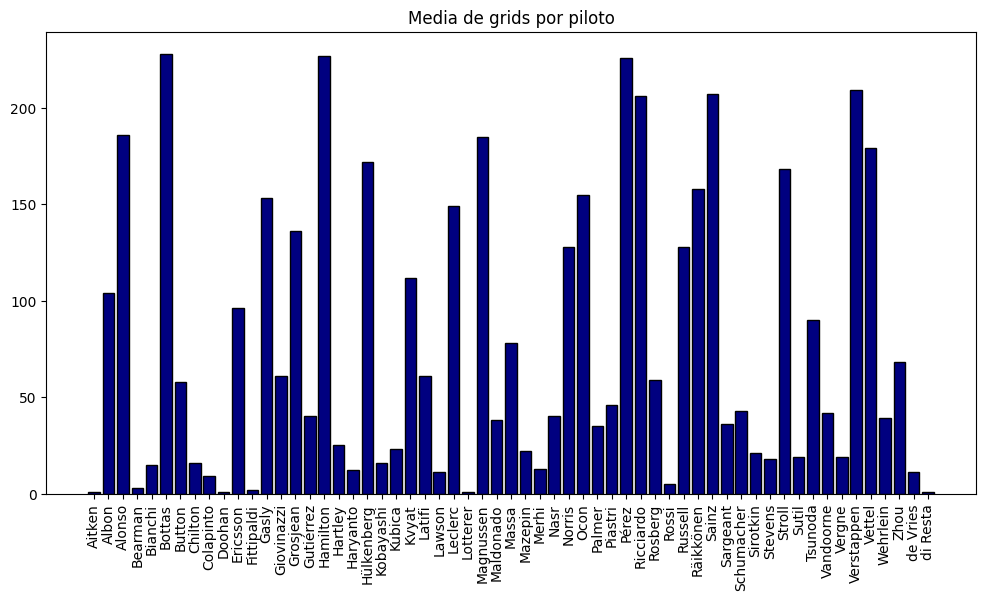

In [11]:
driver_grid = results.groupby("driverId")["grid"].mean()
driver_grid
driver_grid = results.where(results['grid'] == 1).dropna()

driver_grid_counts = qualifying_2014_2024.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    driver_grid_counts["driverId"],
    driver_grid_counts["count"],
    color="navy",
    edgecolor="black"
)
plt.title("Media de grids por piloto")
plt.xticks(rotation=90)


Aquel piloto con una media mas baja, ha estado en las posiciones mas altas del grid, es decir aquel que ha obtenido posiciones mas altas, por lo tanto existe una relacion inversa ente la media de la vaiable grid y la pole position.

¿En qué lap se dió la vuelta rápida por circuito y quién la obtuvo?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

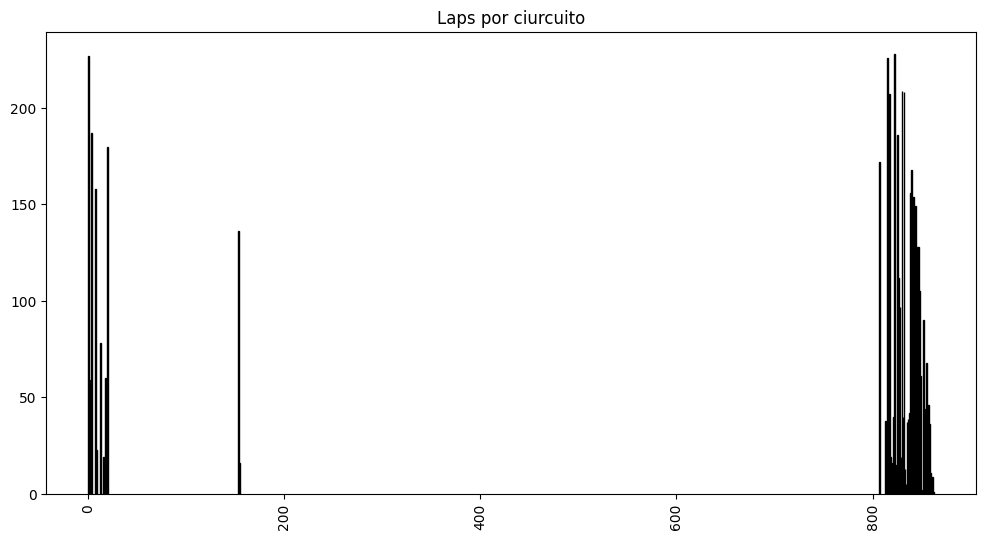

In [19]:
idx = results.groupby("circuitId")["fastestLap"].idxmin()
fast_laps = results.loc[idx, ["circuitId", "driverId", "fastestLap"]]
fast_laps

fast_laps_counts = results.groupby('driverId').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
plt.bar(
    fast_laps_counts["driverId"],
    fast_laps_counts["count"],
    color="navy",
    edgecolor="black"
)
plt.title("Laps por ciurcuito")
plt.xticks(rotation=90)

¿Hay una relación entre velocidad máxima y circuito (altitud)?

¿En que lap es más probable que se haga el primer pit, según el circuito?

¿Hay alguna relación entre el máximo tiempo obtenido en las Qualifications y el de las carreras?
Ejemplo si Pérez obtuvo un tiempo maximo en Q's de 1.48.2, es posible que haya mejoras?

¿Que pilotos han estado mas veces en la Q'3?

<ipython-input-28-6395278c3322>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pilotos["driverId"].astype(str), y=top_pilotos["veces_en_Q3"], palette="mako")


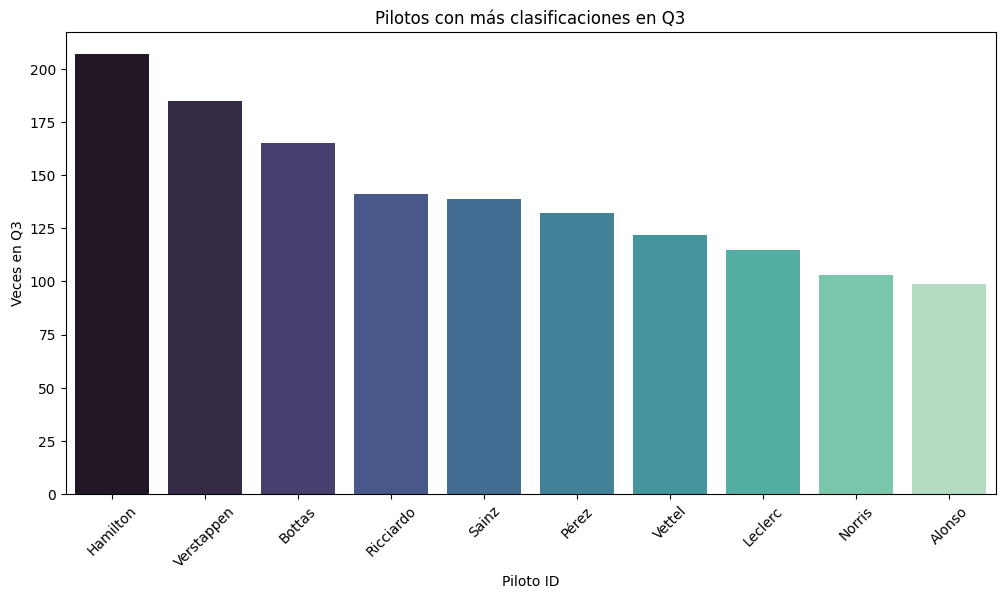

In [28]:
# Filtrar pilotos que estuvieron en Q3 (posiciones de salida del 1 al 10)
pilotos_q3 = qualifying_2014_2024[qualifying_2014_2024["q3"] != "\\N"]

# Contar cuántas veces ha estado cada piloto en Q3
pilotos_q3 = pilotos_q3["driverId"].value_counts().reset_index()

pilotos_q3.columns = ["driverId", "veces_en_Q3"]

pilotos_q3

#Grafico
top_pilotos = pilotos_q3.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pilotos["driverId"].astype(str), y=top_pilotos["veces_en_Q3"], palette="mako")

plt.xlabel("Piloto ID")
plt.ylabel("Veces en Q3")
plt.title("Pilotos con más clasificaciones en Q3")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

plt.show()


Q3 es la ronda final de clasificación, donde los 10 pilotos más rápidos compiten por las mejores posiciones en la parrilla de salida. Por lo que estos son el top 10 de pilotos mas agiles en la formula 1, el cual en el periodo 2014-2024 ha estado encabezado por Hamilton, seguido de Verstappen.

¿Cual es el tiempo promedio de los corredores por circuito?

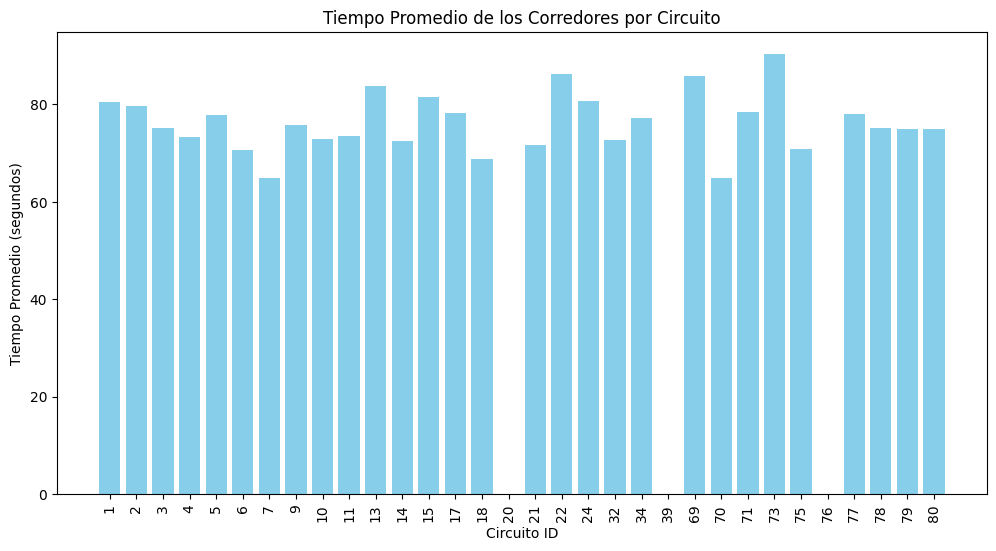

In [25]:
#convertr tiempo en segundos
def convertir_tiempo(time):
    if isinstance(time, str) and ":" in time:
        partes = time.split(":")
        if len(partes) == 2:  # Formato mm:ss.SSS
            minutos = int(partes[0])
            segundos = float(partes[1])
            return minutos * 60 + segundos
    return None  # Si hay valores \N o NaN

# Aplicar la conversión a la columna 'time'
results["time_seconds"] = results["time"].apply(convertir_tiempo)



time_mean = results.groupby("circuitId")["time_seconds"].mean().reset_index()
time_mean

import matplotlib.pyplot as plt

# Ordenar los datos por tiempo promedio
time_mean = time_mean.sort_values(by="circuitId", ascending=True)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(time_mean["circuitId"].astype(str), time_mean["time_seconds"], color="skyblue")

# Etiquetas y título
plt.xlabel("Circuito ID")
plt.ylabel("Tiempo Promedio (segundos)")
plt.title("Tiempo Promedio de los Corredores por Circuito")
plt.xticks(rotation=90)

plt.show()


El circuito 73 tiene el promedio mas lato de tiempo en recorrido por los conductores.

Distribución de las Pole positions de 2014 a 2024

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Hamilton'),
  Text(1, 0, 'Leclerc'),
  Text(2, 0, 'Magnussen'),
  Text(3, 0, 'Norris'),
  Text(4, 0, 'Pérez'),
  Text(5, 0, 'Russell'),
  Text(6, 0, 'Sainz'),
  Text(7, 0, 'Verstappen')])

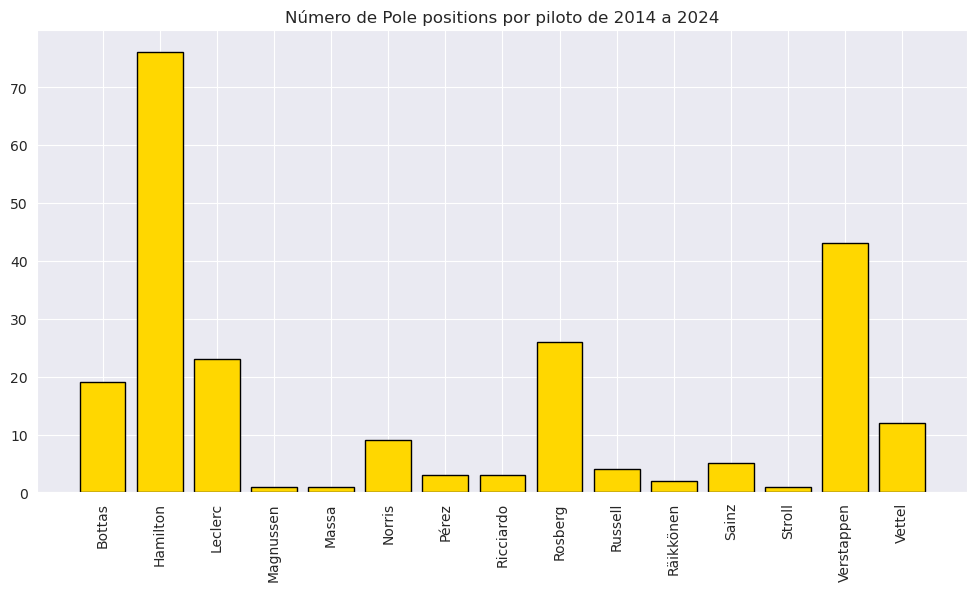

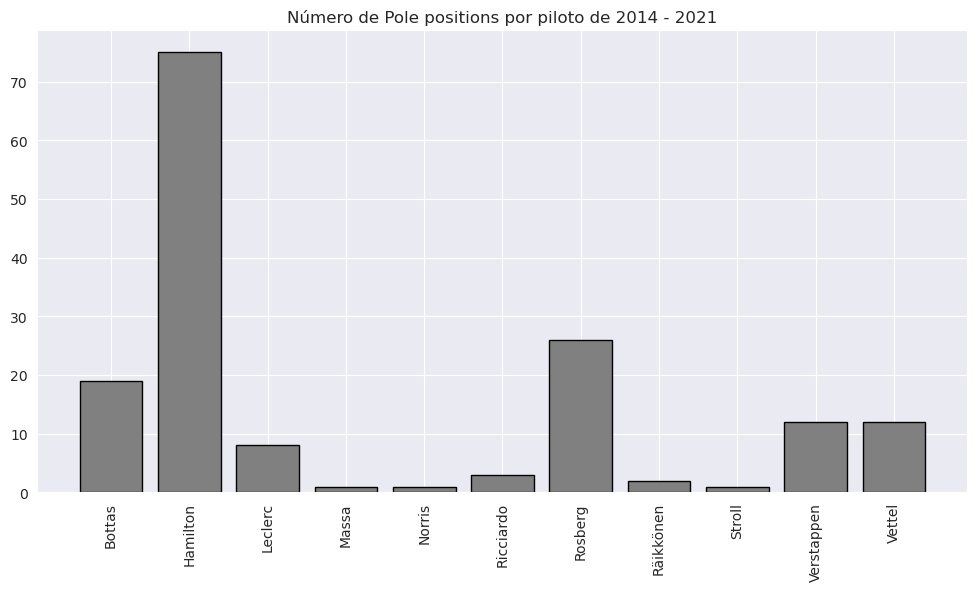

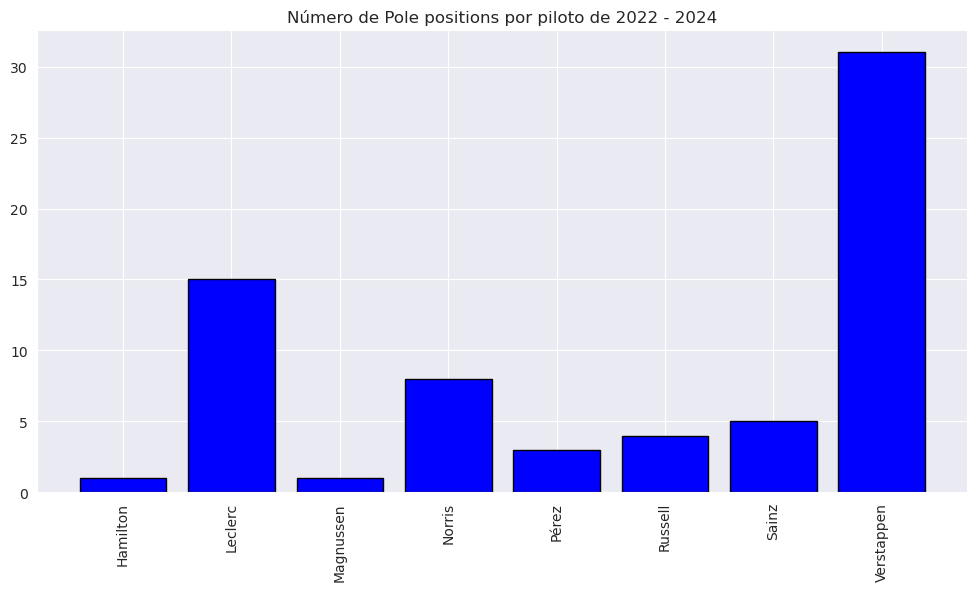

In [ ]:
# making some plots
# contando las pole positions 2014 a 2024
pole_positions = qualifying_2014_2024.where(qualifying_2014_2024['position'] == 1).dropna()

pole_counts = pole_positions.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts["driverId"],
    pole_counts["count"],
    color="gold",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2014 a 2024")
plt.xticks(rotation=90)


# pole position de 2014 - 2021 y 2022-2024
pole_positions_2014_2021 = qualifying_2014_2024.where((qualifying_2014_2024['position'] == 1) & (qualifying_2014_2024['year'] <= 2021)).dropna()
pole_counts_2014_2021 = pole_positions_2014_2021.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2014_2021["driverId"],
    pole_counts_2014_2021["count"],
    color="gray",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2014 - 2021")
plt.xticks(rotation=90)

pole_positions_2022_2024 = qualifying_2014_2024.where((qualifying_2014_2024['position'] == 1) & (qualifying_2014_2024['year'] >2021)).dropna()
pole_counts_2022_2024 = pole_positions_2022_2024.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2022_2024["driverId"],
    pole_counts_2022_2024["count"],
    color="blue",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2022 - 2024")
plt.xticks(rotation=90)


Es posible observar que en el periodo de 2014-2024, el piloto con mas pole positions ha sido Hamilton con poco mas de 70 pole positions, seguido de Verstapen con pococ mas de 40 pole positions, en el top tres tenemos a Rosberg con poco mas de 25 poke positions, es este mismo periodo los pilotos con menor numero de pole positions han sido Massa, Stroll y Magnussen.


En el periodo 2014-2021 (Antes del cambio de reglamento) el piloto con mas pole positios acumuladas fue Hamilton, seguido de Rosberg en segunda posiscion y en tercera posicion de pole positions acumuladas se encuentra Bottas

En lo que respecta al periodo 2022-2024 (despues de aplicar el cambio de regamento), el piloto con mas pole positions acumuladas es Verstappen, seguido de Leclerc, y Norris. Dados los reultados se recomienda hacer un analisis mas detallado sobre las variables que influyeron para estos resultados tras la actualizacion del reglamento.

# Analisis de componentes principales

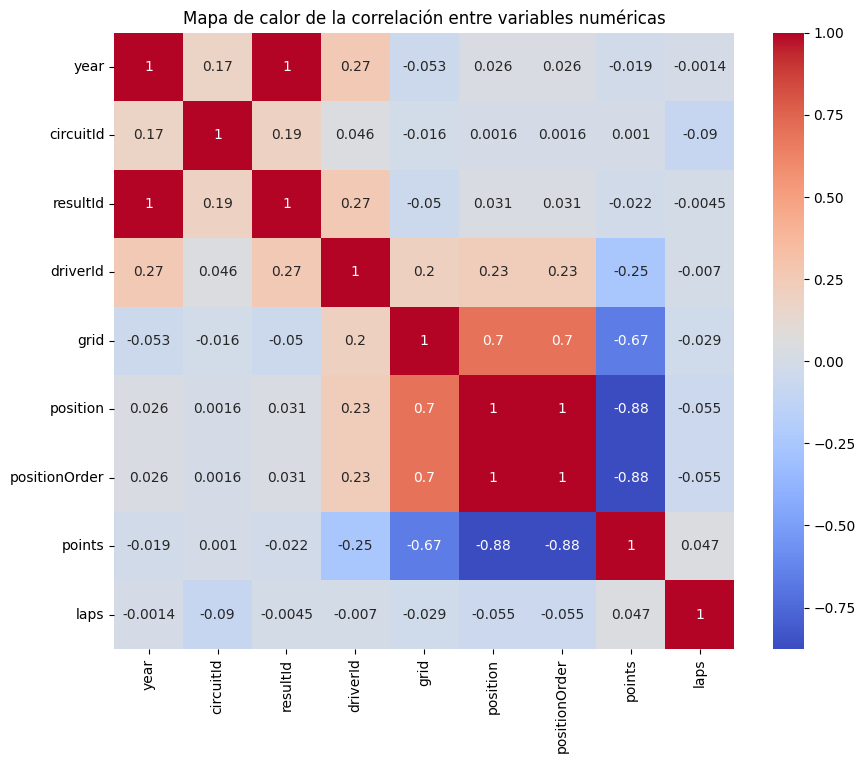

In [45]:

# 5. Mapa de calor de la correlación entre variables numéricas
numerical_vars = ['year','circuitId', 'resultId', 'driverId','grid','position','positionOrder','points', 'laps']
for col in numerical_vars:
    results[col] = pd.to_numeric(results[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
results = results.dropna(subset=numerical_vars)


correlation_matrix = results[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

# Analisis de componentes principales

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis de Componentes Principales (PCA) ---

# Seleccionar las variables numéricas para el PCA
numerical_vars = ['year','circuitId', 'resultId', 'driverId','grid','positionOrder','points', 'laps']

pca_data = results[numerical_vars].dropna()  # Eliminar filas con valores faltantes

# Estandarizar las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df

,PC1,PC2
0,-3.886332,-2.064500
1,-2.528556,-1.719882
2,-2.314709,-2.490317
3,-2.414184,-2.428080
4,-0.671259,-2.266446
...,...,...
3900,1.876388,1.821753
3901,1.806014,1.846694
3902,2.272145,1.716165
3903,2.100025,1.756945
